<a href="https://colab.research.google.com/github/Kristian-Abad/Netflix-Movies-Project/blob/main/Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To do list

**Does this x visualization fall in line with answering any of the focus questions? Would it help the consumer make a more informed data-driven decision?**

Data Visualization/Descriptive & Prescriptive Analysis
* Make an **overall** rating histogram
* Make an **overall** movies entered in Netflix histogram
*   Make an **overal** time difference histogram
*   Redo year difference boxplot by genre
*   Explore quantitative relationships together (if time permits maybe do a quick dive into rating vs duration just to see if there's some trend)

Cleanup
*   Suppress or limit some of the cell outputs
*   Add subsections headers



Report
*   Add description and overall contextualize the issue at the beginning
*   Give a variable breakdown?





# Importing libraries

In [190]:
import numpy as np
import pandas as pd

# Importing the data

The data comes from [this Kaggle dataset.](https://www.kaggle.com/datasets/amjaads/netflix-movies?resource=download). Aside from the Kaggle [here](https://rapidapi.com/rasiqueira/api/netflix-unofficial/details)'s more information about the variables something akin to a codebook where the Kaggle author used this API for web scraping.

The dataset uses [minimum IMDB rating](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#). Since users can edit their vote on a title, the ratings are up to the time that the data was collected.

In [191]:
data = pd.read_csv('Netflix_movies.csv')

# Exploring our data

In [192]:
pd.set_option('max_rows', 10)
data.head()

,Unnamed: 0,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [193]:
data.describe()

,Unnamed: 0,Duration,year,rating
count,3323.000000,3323.000000,3323.000000,3323.000000
mean,1948.578393,110.955763,2012.925068,6.200150
std,1124.986356,76.070693,9.203799,1.180711
min,1.000000,4.000000,1942.000000,0.000000
25%,972.500000,89.000000,2012.000000,5.500000
50%,1950.000000,101.000000,2016.000000,6.300000
75%,2923.500000,118.000000,2018.000000,7.100000
max,3896.000000,798.000000,2020.000000,9.100000


In [194]:
data.loc[:,'Unnamed: 0']

0          1
1          4
2          5
3          7
4          9
        ... 
3318    3892
3319    3893
3320    3894
3321    3895
3322    3896
Name: Unnamed: 0, Length: 3323, dtype: int64

We're going to need to deal with this column later.

In [195]:
data.shape

(3323, 10)

Okay so we're dealing with a dataframe with 3,323 records across 10 variables.

In [196]:
data.isna().any()

Unnamed: 0          False
movie_name          False
Duration            False
year                False
genre               False
director            False
actors              False
country             False
rating              False
enter_in_netflix    False
dtype: bool

Looks like we are fortunate enough to not have any missing values.

In [197]:
data = data.rename(columns={"Unnamed: 0" : "index"})
data.head()

,index,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


Since the now index column is non-monotonic let's just drop it.

In [198]:
data = data.drop(columns='index')
# Verifying we have dropped the 'index' column
data.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [199]:
data[data.genre == 'Comedies'].head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
61,A Bad Moms Christmas,104,2017,Comedies,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",5.6,"February 14, 2020"
77,A Futile and Stupid Gesture,102,2018,Comedies,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,6.8,"January 26, 2018"
107,A Thousand Words,92,2012,Comedies,Brian Robbins,"Eddie Murphy, Kerry Washington, Cliff Curtis, ...",United States,5.9,"July 1, 2020"
149,Adventures in Public School,86,2018,Comedies,Kyle Rideout,"Daniel Doheny, Judy Greer, Siobhan Williams, R...","Canada, United States",5.8,"August 15, 2018"


It looks like the genres are sorted alphabetically in a given genre cell.


# Focus Questions

Say you are deciding between keeping different streaming services and are wondering besides platform exclusives, what makes Netflix lucrative from a data driven standpoint?:

Overarching questions
*   What does it's catalogue of movies have to offer?
*   What can be said about the quality of movies for Netflix customers?
*   How recent is the content?
*   What is the breakdown on where the content of Netflix is produced?





Tentative specific questions:
*   How are genres distributed? And by year?
*   What can be said about movies from other countries?
*   How recent does Netflix put in movies or equivalently what is the difference in year when movies are produced and entered into Netflix? What is the frequency of those differences?

# Genre Composition

For the purposes of this project it's important to note a big limitation here as the data puts some limit on some of the interpretations. I have to grant the genre overlap (i.e. having more than 1 genre for a given movie) since 85% of the data (as can be seen on Kaggle as other under genre) are classified as having more than one genre associated with a given movie. The caveat of this is that we cannot simply say X% of movies are exclusive to this genre and Y% is exclusive to another. 

This is because trying to classify movies as mutually exclusive to one genre from another introduces what I like to call a "rabbithole of subjectivity" that is better to be avoided for now and is better suited for the purposes of this project which is getting some idea of what Netflix offers in terms of movies overall. What I mean is that if we were to classify a movie as belonging to more of a certain genre we run into issues trying to answer the following:

*   What elements make a movie belong to this genre?
*   Are these elements a hard yes or no when it comes to labeling a movie as a certain genre? Is it possible to say movies contain a certain percent of elements from a genre and fall more on a spectrum?

Moving forward, we'll grant that the movies share some level of belonging to the genres they are labeled as as we will have to work with totals for some variable (say genre) and not percentages of the entire collection of movies. It's a distinction that I will try to explicitly state and keep in mind as later in this section we explore total counts for genre. At any rate, let's explore the data:

Here we use keywords from genres currently listed on Netflix's website as of 8/31/2022

In [200]:
print('Action:',data[data.genre.str.contains('Action')].shape,
      '\nAnime:',data[data.genre.str.contains('Anime')].shape,
      '\nBlack:',data[data.genre.str.contains('Black')].shape,
      '\nChildren:',data[data.genre.str.contains('Children')].shape,
      '\nClassics:',data[data.genre.str.contains('Classics')].shape,
      '\nComedies:',data[data.genre.str.contains('Comedies')].shape,
      '\nCrime:',data[data.genre.str.contains('Crime')].shape,
      '\nCult:',data[data.genre.str.contains('Cult')].shape,
      '\nDocumentaries',data[data.genre.str.contains('Documentaries')].shape,
      '\nDramas:',data[data.genre.str.contains('Dramas')].shape,
      '\nFaith:',data[data.genre.str.contains('Faith')].shape,
      '\nSci-Fi & Fantasy:',data[data.genre.str.contains('Fantasy')].shape,
      '\nHorror:',data[data.genre.str.contains('Horror')].shape,
      '\nIndependent:',data[data.genre.str.contains('Independent')].shape,
      '\nInternational:',data[data.genre.str.contains('International')].shape,
      '\nLGBTQ:',data[data.genre.str.contains('LGBTQ')].shape,
      '\nMusic & Musicals:',data[data.genre.str.contains('Music')].shape,
      '\nRomance:',data[data.genre.str.contains('Romance')].shape,
      '\nShort:',data[data.genre.str.contains('Short')].shape,
      '\nSport:',data[data.genre.str.contains('Sport')].shape,
      '\nStand-Up Comedy:',data[data.genre.str.contains('Stand')].shape,
      '\nThriller:',data[data.genre.str.contains('Thriller')].shape
      )

Action: (488, 9) 
Anime: (49, 9) 
Black: (0, 9) 
Children: (289, 9) 
Classics: (0, 9) 
Comedies: (1010, 9) 
Crime: (0, 9) 
Cult: (41, 9) 
Documentaries (219, 9) 
Dramas: (1461, 9) 
Faith: (30, 9) 
Sci-Fi & Fantasy: (142, 9) 
Horror: (219, 9) 
Independent: (484, 9) 
International: (1665, 9) 
LGBTQ: (45, 9) 
Music & Musicals: (171, 9) 
Romance: (0, 9) 
Short: (0, 9) 
Sport: (100, 9) 
Stand-Up Comedy: (261, 9) 
Thriller: (332, 9)


In [201]:
pd.set_option('max_rows', 10)

In [202]:
data_mod = data.copy()
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"
...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,"September 15, 2018"
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,"September 15, 2018"
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,"September 15, 2018"
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,"September 1, 2018"


In [203]:
data_mod.loc[:,'enter_in_netflix'] = pd.DatetimeIndex(data_mod.enter_in_netflix).year
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,2020
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,2019
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,2019
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,2017
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,2019
...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,2018
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,2018
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,2018
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,2018


In [204]:
# For each movie, check the genre and if it contains the genre of the newly created column
# Set it equal to 1 if it does otherwise set it to 0.
data_mod['Action'] = np.where(data_mod.genre.str.contains('Action'),1,0)
data_mod['Anime'] = np.where(data_mod.genre.str.contains('Anime'),1,0)
data_mod['Children'] = np.where(data_mod.genre.str.contains('Children'),1,0)
data_mod['Comedies'] = np.where(data_mod.genre.str.contains('Comedies'),1,0)
data_mod['Cult'] = np.where(data_mod.genre.str.contains('Cult'),1,0)
data_mod['Documentaries'] = np.where(data_mod.genre.str.contains('Documentaries'),1,0)
data_mod['Dramas'] = np.where(data_mod.genre.str.contains('Dramas'),1,0)
data_mod['Faith'] = np.where(data_mod.genre.str.contains('Faith'),1,0)
data_mod['Fantasy'] = np.where(data_mod.genre.str.contains('Fantasy'),1,0)
data_mod['Horror'] = np.where(data_mod.genre.str.contains('Horror'),1,0)
data_mod['Independent'] = np.where(data_mod.genre.str.contains('Independent'),1,0)
data_mod['International'] = np.where(data_mod.genre.str.contains('International'),1,0)
data_mod['LGBTQ'] = np.where(data_mod.genre.str.contains('LGBTQ'),1,0)
data_mod['Music'] = np.where(data_mod.genre.str.contains('Music'),1,0)
data_mod['Sport'] = np.where(data_mod.genre.str.contains('Sport'),1,0)
data_mod['Stand-up'] = np.where(data_mod.genre.str.contains('Stand'),1,0)
data_mod['Thriller'] = np.where(data_mod.genre.str.contains('Thriller'),1,0)

#Verify that we have the new columns
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,2020,0,...,0,0,0,0,1,0,0,0,0,0
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,2019,0,...,0,0,0,0,1,0,0,0,0,0
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,2017,0,...,0,0,0,0,0,0,0,0,0,0
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,2018,1,...,0,0,0,0,1,0,0,0,0,0
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,2018,0,...,0,0,0,0,1,0,0,0,0,0
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,2018,0,...,0,0,0,0,1,0,0,0,0,0
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,2018,0,...,0,0,0,1,1,0,0,0,0,0


In [205]:
data_mod_2 = data_mod.loc[:,'enter_in_netflix':'Thriller'].melt(id_vars=['enter_in_netflix'],var_name='Genre',value_name='Count')
data_mod_2

,enter_in_netflix,Genre,Count
0,2020,Action,0
1,2019,Action,0
2,2019,Action,0
3,2017,Action,0
4,2019,Action,0
...,...,...,...
56486,2018,Thriller,0
56487,2018,Thriller,0
56488,2018,Thriller,0
56489,2018,Thriller,0


In [206]:
data_mod_2.to_csv('/content/genre_count.csv')

After putting the data into Tableau here's a general overview of all the genres by year:
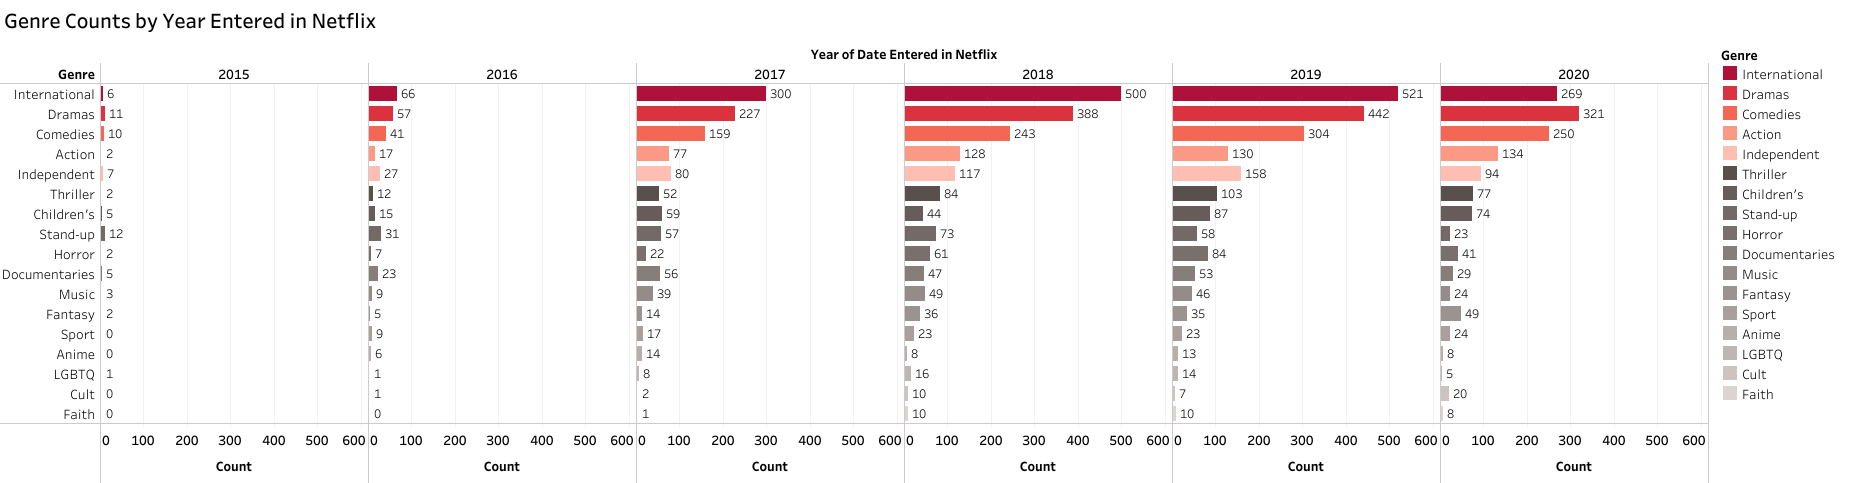

Based off the breakdown of the counts, Netflix would be very good for consumers looking for a substantial catalogue in international, dramas, comedies, action, independent, and all films in between. It looks like for the top 5 genres they've been steadily increasing ever since 2015 but international movies lost 51.6% of its selections from 2019 to 2020. Why is that? [In 2020 Netflix decided to cut on some of their catalogue and implement more original titles which could provide some historical domain knowledge that could explain the cut in their top genres.](https://www.businessinsider.com/how-netflix-movie-and-tv-show-catalog-changed-over-time-2020-2#netflixs-total-number-of-movies-and-tv-shows-combined-has-decreased-from-over-7000-titles-in-2010-to-fewer-than-6000-titles-in-2020-its-number-of-movies-has-decreased-significantly-in-the-last-decade-while-its-number-of-tv-shows-has-nearly-quadrupled-1)

The last visualization was great but I want to take the time to see how each of these genres are distributed with time:
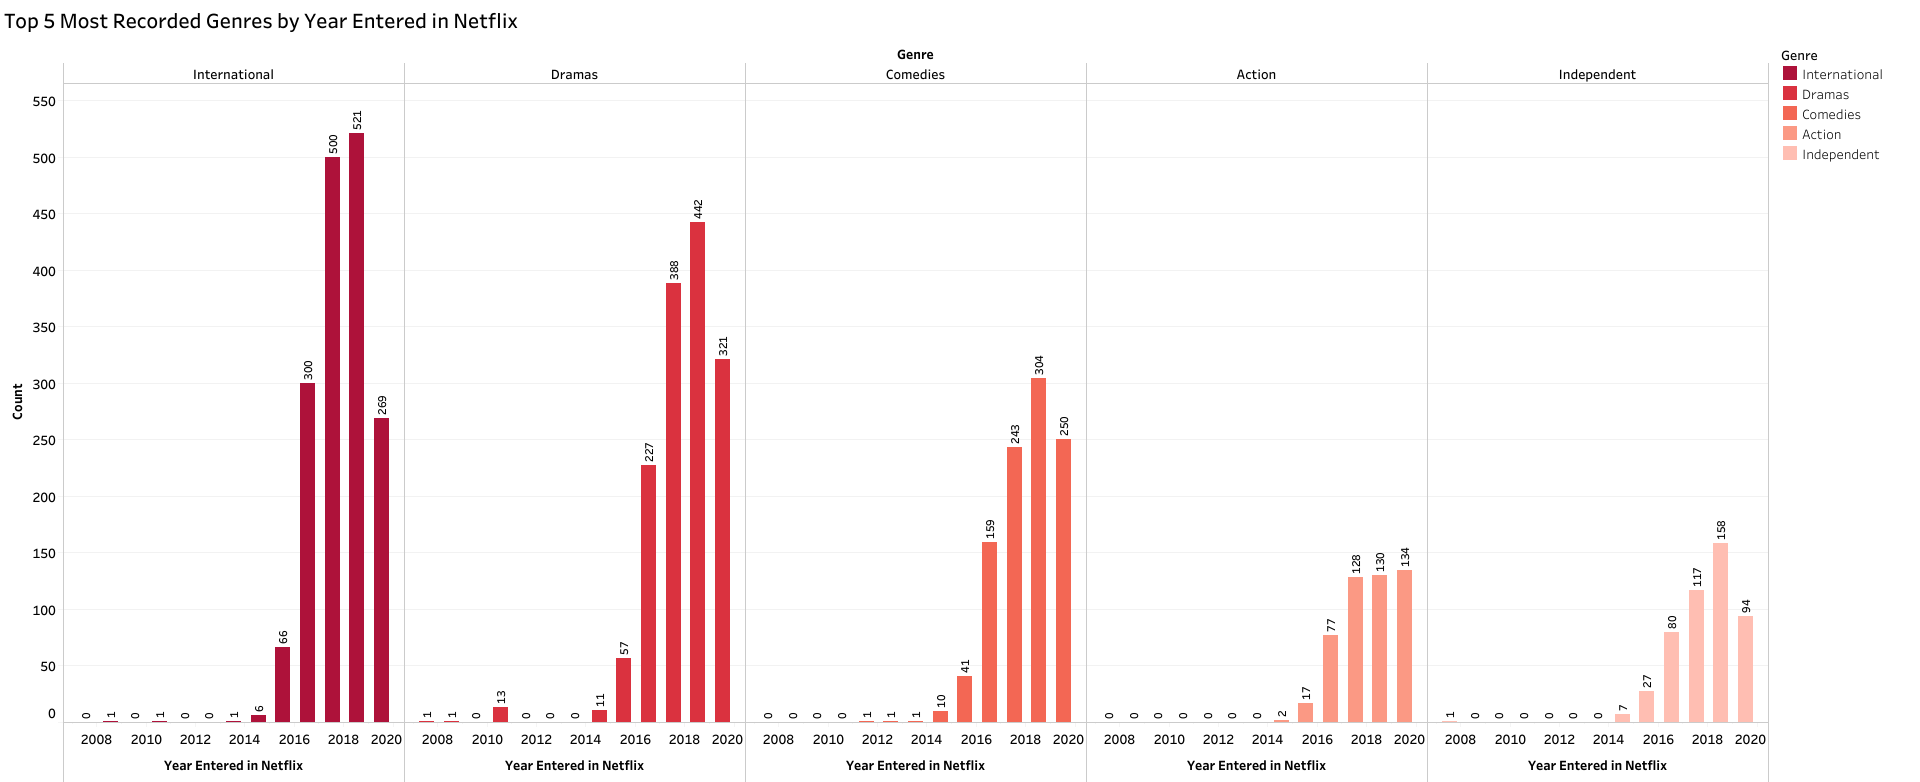

The top three genres International, Dramas, and Comedies are distributed very similarly with most genre counts occurring betwen 2015 and 2020. The dropoff of counts is very evident in 4 of the genres and is consistent from what we know about how Netflix changed their goals (i.e. shifting to more original content). In terms of further explanation, because Netflix was putting resources into original content that endeavour can also include [filming ahead of time especially in other countries](https://www.theverge.com/2020/4/22/21231023/netflix-tv-shows-movies-new-2020-pandemic-production-disney-universal-warner-bros-sony). At the time, the pandemic stifled that effort a bit with reports saying that they only filmed in South Korea as well Iceland as they were unsure of "international travel" as well as planning out resources (talent, stages and post-production).

So what might this mean? Well we know that many of the movies in this dataset have multiple genres associated with it. If a good chunk of International movies (the top most genre) suffered due to the pandemic and were also associated with the subsequent top categories (Dramas and Comedies) then we can expect to also see a decline in those categories as well. Additionally, this would also go on to explain one possible reason why they share such strikingly similar distributions. However, this is only really an idea so let's see if we can actually see the data that would support this. We're going to need to look for the following combinations of genres:


*   International, Dramas
*   International, Comedies
*   International, Comedies, Dramas

In [207]:
# Create a subset that contains movies categorized as International and Dramas
# but not Comedies
data_mod_inter_drama = data_mod[

          ( data_mod.genre.str.contains('International') ) & 
          ( data_mod.genre.str.contains('Dramas') ) & 
          ( ~data_mod.genre.str.contains('Comedies') ) &
          ( data_mod.enter_in_netflix == 2019 ) 
         ]

data_mod_inter_drama_2 = data_mod[

          ( data_mod.genre.str.contains('International') ) & 
          ( data_mod.genre.str.contains('Dramas') ) & 
          ( ~data_mod.genre.str.contains('Comedies') ) &
          ( data_mod.enter_in_netflix == 2020 ) 
         ]
         


#Verifying that the subset doesn't contain any Comedies
data_mod_inter_drama[data_mod_inter_drama.genre.str.contains('Comedies')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller


In [208]:
data_mod_inter_drama

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller
30,3 Deewarein,121,2003,"Dramas, International Movies, Thrillers",Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",India,7.8,2019,0,...,0,0,0,0,1,0,0,0,0,1
32,3 Heroines,124,2016,"Dramas, International Movies, Sports Movies",Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,6.5,2019,0,...,0,0,0,0,1,0,0,1,0,0
36,300 Miles to Heaven,93,1989,"Dramas, International Movies",Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland",7.2,2019,0,...,0,0,0,0,1,0,0,0,0,0
76,A Fortunate Man,168,2018,"Dramas, International Movies",Bille August,"Esben Smed, Katrine Rosenthal, Benjamin Kitter...",Denmark,7.2,2019,0,...,0,0,0,0,1,0,0,0,0,0
86,A Land Imagined,95,2019,"Dramas, International Movies",Yeo Siew Hua,"Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico,...","France, Netherlands, Singapore",6.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Westerplatte Resists,93,1967,"Classic Movies, Dramas, International Movies",Stanisław Różewicz,"Zygmunt Hübner, Arkadiusz Bazak, Tadeusz Schmi...",Poland,7.1,2019,0,...,0,0,0,0,1,0,0,0,0,0
3250,Who Would You Take to a Deserted Island?,94,2019,"Dramas, International Movies",Jota Linares,"María Pedraza, Jaime Lorente, Pol Monen, Andre...",Spain,5.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
3252,Why Me?,126,2015,"Dramas, International Movies, Thrillers",Tudor Giurgiu,"Emilian Oprea, Mihai Constantin, Andreea Vasil...","Romania, Bulgaria, Hungary",7.5,2019,0,...,0,0,0,0,1,0,0,0,0,1
3294,Your Son,103,2018,"Dramas, International Movies, Thrillers",Miguel Ángel Vivas,"José Coronado, Ana Wagener, Asia Ortega, Pol M...","Spain, France",6.1,2019,0,...,0,0,0,0,1,0,0,0,0,1


In [209]:
# Create a subset that contains movies categorized as International and Comedies
# but not Dramas
data_mod_inter_comedies = data_mod[( data_mod.genre.str.contains('International') ) & 
                                   ( data_mod.genre.str.contains('Comedies') ) &
                                   ( ~data_mod.genre.str.contains('Dramas') ) &
                                   ( data_mod.enter_in_netflix == 2019 )
                                   ]

data_mod_inter_comedies_2 = data_mod[( data_mod.genre.str.contains('International') ) & 
                                   ( data_mod.genre.str.contains('Comedies') ) &
                                   ( ~data_mod.genre.str.contains('Dramas') ) &
                                   ( data_mod.enter_in_netflix == 2020 )
                                   ]

#Verifying that the subset doesn't contain any Dramas
data_mod_inter_comedies[data_mod_inter_comedies.genre.str.contains('Dramas')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller


In [210]:
data_mod_top_3_genres = data_mod[( data_mod.genre.str.contains('International') ) & 
                                 ( data_mod.genre.str.contains('Dramas') ) &
                                 ( data_mod.genre.str.contains('Comedies') ) & 
                                 ( data_mod.enter_in_netflix == 2019 )]

data_mod_top_3_genres_2 = data_mod[( data_mod.genre.str.contains('International') ) & 
                                 ( data_mod.genre.str.contains('Dramas') ) &
                                 ( data_mod.genre.str.contains('Comedies') ) & 
                                 ( data_mod.enter_in_netflix == 2020 )]

In [211]:
print('Number of movies that are International and Dramatic in 2019:',data_mod_inter_drama.shape[0])
print('Number of movies that are International and Comedic in 2019:',data_mod_inter_comedies.shape[0])
print('Number of movies that are International, Dramatic, and Comedic in 2019:',data_mod_top_3_genres.shape[0],'\n')

print('Number of movies that are International and Dramatic in 2020:',data_mod_inter_drama_2.shape[0])
print('Number of movies that are International and Comedic in 2020:',data_mod_inter_comedies_2.shape[0])
print('Number of movies that are International, Dramatic, and Comedic in 2020:',data_mod_top_3_genres_2.shape[0])

total_international_loss = 521 - 269
inter_drama_loss = 243 - 114
inter_drama_loss_proportion = round((inter_drama_loss/total_international_loss)*100,1)

inter_comedies_loss = 109 - 65
inter_comedies_loss_proportion = round((inter_comedies_loss/total_international_loss)*100,1)

top_3_loss = 59 - 43
top_3_loss_proportion = round((top_3_loss/total_international_loss)*100,1)

print('\nTotal international movie loss from 2019 to 2020:', total_international_loss)
print('International, Drama loss:', inter_drama_loss)
print('International, Drama loss contributed to total international movie loss:', inter_drama_loss_proportion,'%' )

print('International, Comedies loss:', inter_comedies_loss)
print('International, Comedies loss contributed to total international movie loss:', inter_comedies_loss_proportion,'%' )
print('Top 3 loss:', top_3_loss)
print('Top 3 loss contributed to total international movie loss:', top_3_loss_proportion,'%' )

Number of movies that are International and Dramatic in 2019: 243
Number of movies that are International and Comedic in 2019: 109
Number of movies that are International, Dramatic, and Comedic in 2019: 59 

Number of movies that are International and Dramatic in 2020: 114
Number of movies that are International and Comedic in 2020: 65
Number of movies that are International, Dramatic, and Comedic in 2020: 43

Total international movie loss from 2019 to 2020: 252
International, Drama loss: 129
International, Drama loss contributed to total international movie loss: 51.2 %
International, Comedies loss: 44
International, Comedies loss contributed to total international movie loss: 17.5 %
Top 3 loss: 16
Top 3 loss contributed to total international movie loss: 6.3 %


What can be said from the output of the code? Judging by the above composition of observed genres, the International, Dramas combination composed about half of the 521 total international films (243 to be exact) in 2019. The duality of International and Dramas movies dropped to 114 of the total 269 films in 2020. Furthermore, we also see a drop in the other genres as well which helps support my partial answer as to why we see these drops in counts for each genre as well as why they look similar at the discussed point in time. I think the limitation here is that we only have the total genre counts but not the major genres in tandem with the others. All in all for this section, the data would help support the narrative of the articles at the time.

To do:


*   create data_mod_3 for genre vs. rating



# Rating Breakdown

Let's look at the overall ratings and how they're distributed:
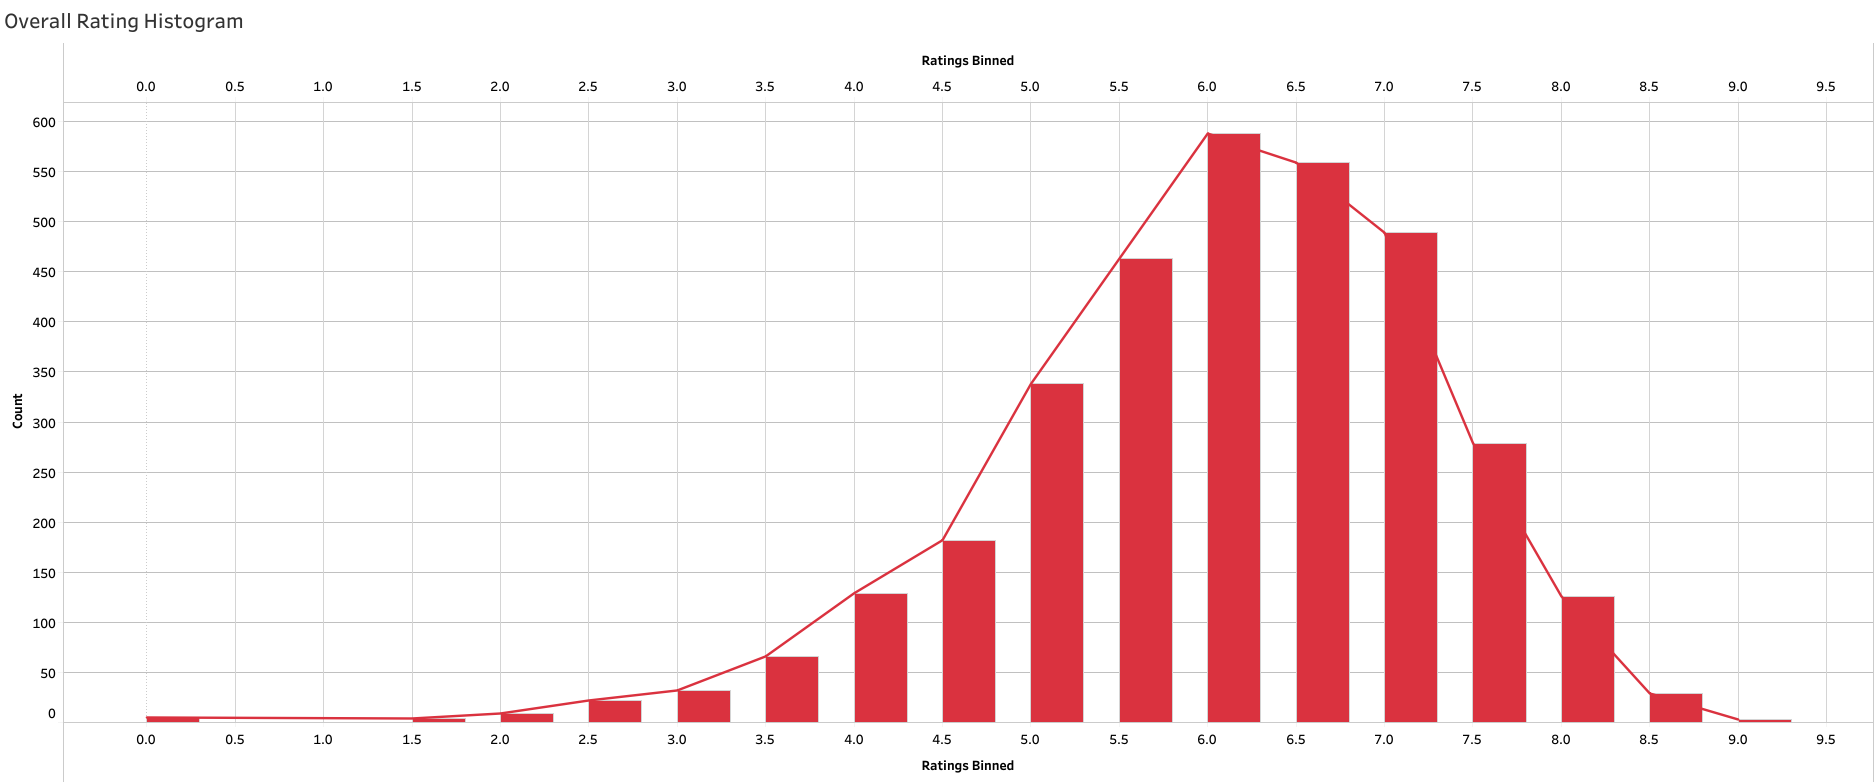

There is a slight right skew in the distribution and so the count is leaning more towards lower ratings. Based off the curve, the center of the data falls somewhere around a 6. However, that would need to be further examined as later as the left tail of the distribution is asymmetrical with the right tail end indicating some possible outliers  namely the movies with a zero rating. In terms of variance or spread of the data, most of the ratings are spread in the rating range of a 4 to an 8 and so ratings are fairly spread which generally speaking I think is something to be expected.

In [212]:
pd.set_option('max_rows',9999)
data[data.rating == 0]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
47,6 Days,94,2017,"Action & Adventure, Dramas, International Movies",Toa Fraser,"Jamie Bell, Abbie Cornish, Mark Strong, Martin...","New Zealand, United Kingdom",0.0,"February 8, 2018"
54,7 años,77,2016,"Dramas, International Movies",Roger Gual,"Paco León, Juana Acosta, Juan Pablo Raba, Alex...",Spain,0.0,"October 27, 2016"
855,El testigo,73,2018,"Documentaries, International Movies",Kate Horne,Jesús Abad Colorado,Dominican Republic,0.0,"June 28, 2019"
1176,Holy Goalie,95,2017,"Comedies, International Movies, Sports Movies",Curro Velázquez,"Karra Elejalde, Alain Hernández, Juan Manuel M...",Spain,0.0,"April 27, 2018"
2214,Rembat,88,2015,"Action & Adventure, Comedies, International Mo...",Shamyl Othman,"Shaheizy Sam, Aniu, Zizan Razak, Zara Zya, Arj...",Malaysia,0.0,"August 21, 2017"


In [213]:
pd.set_option('max_rows',10)

This is a bit strange considering looking at the ratings now all of these titles definitely don't have ratings anywhere near zero. My guess as to why they have ratings of zero are:


*   Issues with Rapid API 

And or

*   At the time of webscraping in 2021, some of the titles were yet to have posted ratings (very unlikely)

Using the WayBackMachine for the movies that were archived and getting as close to when the dataset was first posted, we can see that these movies definitely had ratings. Therefore, it's more likely that there was an error in creating the dataset when using Rapid API.

*   [7 años](https://web.archive.org/web/20210912152610/https://www.imdb.com/title/tt5517438/)
*   [El testigo](https://web.archive.org/web/20210712161258/https://www.imdb.com/title/tt9149838/)

Considering that IMDB ratings can be added as well as updated and ratings for these movies at the time of webscraping are unavailable, I'll hold off on updating the ratings for the movies I don't have information on. If  I were to add the ratings I see now they would be ratings based off reviews up to now which would compromise accuracy. Since the earlier section dealt with counts of genres, I won't need to backtrack and update the data there.




In [214]:
# Updating "7 años" rating
data_mod.loc[54,'rating'] = 6.8

# Updating "El testigo" rating
data_mod.loc[855,'rating'] = 8.1
data_mod[(data_mod.movie_name == '7 años') | (data_mod.movie_name == 'El testigo')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller
54,7 años,77,2016,"Dramas, International Movies",Roger Gual,"Paco León, Juana Acosta, Juan Pablo Raba, Alex...",Spain,6.8,2016,0,...,0,0,0,0,1,0,0,0,0,0
855,El testigo,73,2018,"Documentaries, International Movies",Kate Horne,Jesús Abad Colorado,Dominican Republic,8.1,2019,0,...,0,0,0,0,1,0,0,0,0,0


Here I'm going to create some new subsets of the data so I can aggregate rating, counts, and get an average for each genre.

In [215]:
# Let's create a new subset of the data
data_mod_3 = data_mod.loc[:,'rating':'Thriller'].drop(columns=['enter_in_netflix']).melt(id_vars=['rating'],var_name='Genre',value_name='Count')
data_mod_3.head()

,rating,Genre,Count
0,7.0,Action,0
1,6.1,Action,0
2,6.3,Action,0
3,5.2,Action,0
4,5.3,Action,0


In [216]:
pd.set_option('max_rows',20)

In [217]:
# Filter only countable genres, group by genre, take sum for rating and Count, and
# 'ungroup' the data
data_mod_4 = data_mod_3[data_mod_3.Count == 1].groupby(['Genre']).sum().reset_index()
data_mod_4['avg_rating'] = data_mod_4.rating/data_mod_4.Count
data_mod_4

,Genre,rating,Count,avg_rating
0,Action,2966.2,488,6.078279
1,Anime,342.3,49,6.985714
2,Children,1721.0,289,5.955017
3,Comedies,5993.9,1010,5.934554
4,Cult,284.4,41,6.936585
5,Documentaries,1535.2,219,7.010046
6,Dramas,9369.4,1461,6.413005
7,Faith,177.6,30,5.920000
8,Fantasy,838.9,142,5.907746
9,Horror,1171.5,219,5.349315


Visualizing this data wasn't very interesting nor helpful in answering some of the focus questions especially since most of the genres had outliers as we'll see in the next subsection.

## The Rating Distribution of Genres

I decided I also want the individual data points to see things like distribution across genres so let's make another subset that's more granular and export that as well. To make things simpler without backtracking on code and interfering on previous work, we're going to have to redo some of the code we did earlier.

In [218]:
data_mod_5 = data.copy()
# Updating "7 años" rating
data_mod_5.loc[54,'rating'] = 6.8

# Updating "El testigo" rating
data_mod_5.loc[855,'rating'] = 8.1

#Verifying rating updates
data_mod_5[(data_mod_5.movie_name == '7 años') | (data_mod_5.movie_name == 'El testigo')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
54,7 años,77,2016,"Dramas, International Movies",Roger Gual,"Paco León, Juana Acosta, Juan Pablo Raba, Alex...",Spain,6.8,"October 27, 2016"
855,El testigo,73,2018,"Documentaries, International Movies",Kate Horne,Jesús Abad Colorado,Dominican Republic,8.1,"June 28, 2019"


In [219]:
data_mod_5['Action'] = np.where(data_mod_5.genre.str.contains('Action'),1,0)
data_mod_5['Anime'] = np.where(data_mod_5.genre.str.contains('Anime'),1,0)
data_mod_5['Children'] = np.where(data_mod_5.genre.str.contains('Children'),1,0)
data_mod_5['Comedies'] = np.where(data_mod_5.genre.str.contains('Comedies'),1,0)
data_mod_5['Cult'] = np.where(data_mod_5.genre.str.contains('Cult'),1,0)
data_mod_5['Documentaries'] = np.where(data_mod_5.genre.str.contains('Documentaries'),1,0)
data_mod_5['Dramas'] = np.where(data_mod_5.genre.str.contains('Dramas'),1,0)
data_mod_5['Faith'] = np.where(data_mod_5.genre.str.contains('Faith'),1,0)
data_mod_5['Fantasy'] = np.where(data_mod_5.genre.str.contains('Fantasy'),1,0)
data_mod_5['Horror'] = np.where(data_mod_5.genre.str.contains('Horror'),1,0)
data_mod_5['Independent'] = np.where(data_mod_5.genre.str.contains('Independent'),1,0)
data_mod_5['International'] = np.where(data_mod_5.genre.str.contains('International'),1,0)
data_mod_5['LGBTQ'] = np.where(data_mod_5.genre.str.contains('LGBTQ'),1,0)
data_mod_5['Music'] = np.where(data_mod_5.genre.str.contains('Music'),1,0)
data_mod_5['Sport'] = np.where(data_mod_5.genre.str.contains('Sport'),1,0)
data_mod_5['Stand-up'] = np.where(data_mod_5.genre.str.contains('Stand'),1,0)
data_mod_5['Thriller'] = np.where(data_mod_5.genre.str.contains('Thriller'),1,0)

In [220]:
data_mod_5 = data_mod_5.loc[:,'rating':'Thriller'].melt(id_vars=['rating','enter_in_netflix'],var_name='Genre',value_name='Count')
data_mod_5 = data_mod_5[data_mod_3.Count == 1]
data_mod_5.head()

,rating,enter_in_netflix,Genre,Count
12,6.3,"April 3, 2019",Action,1
23,5.8,"March 15, 2020",Action,1
27,5.8,"April 7, 2018",Action,1
28,5.9,"October 1, 2018",Action,1
47,0.0,"February 8, 2018",Action,1


In [221]:
data_mod_5.to_csv('/content/ratings_by_genre.csv')

### Plot & Analysis

After doing some visualizations with the outputted subsets of data, I found this visualization to be particularly interesting:

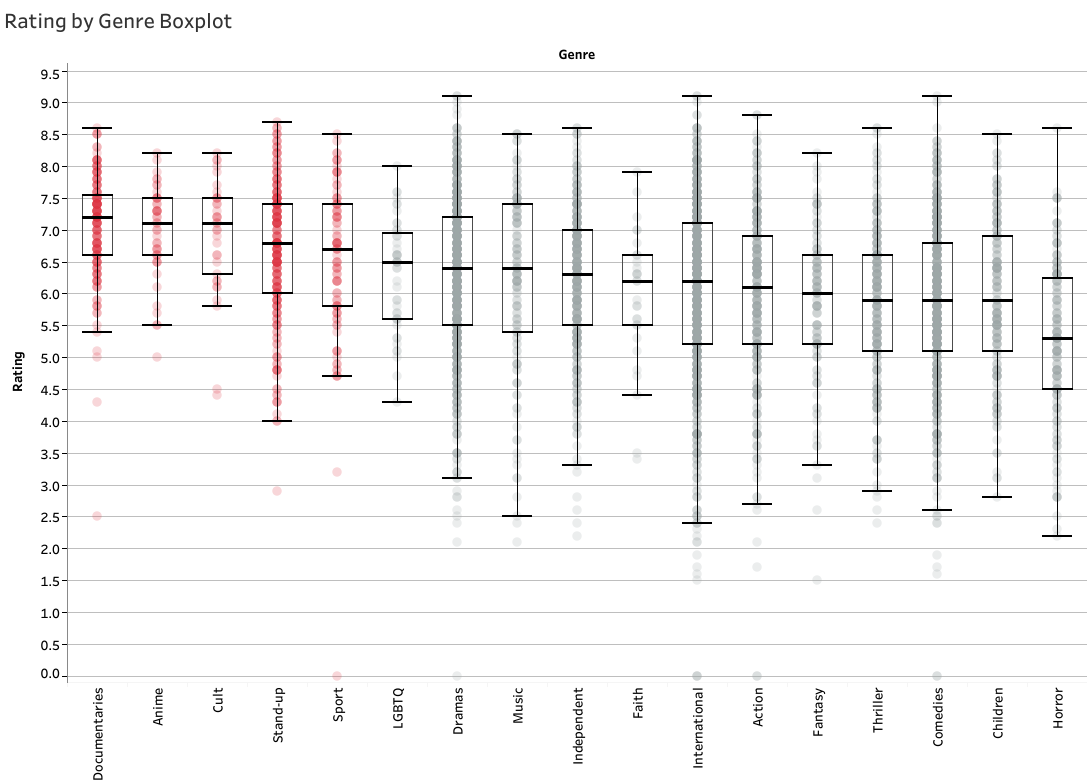

The boxplots are ordered from highest to lowest medians. The top 5 **marked as** Documentaries, Anime, Cult Classic, Stand-Up, and Sport all look right skewed meaning the center of the data tends to be closer to higher ratings. Documentaries overall has a much wider spread (i.e. it's whiskers are longer) but it's middle 50% of its data points (interquartile range) are very similar to Anime movies. Out of the top 5, Documentaries, Stand-up, and Sport movies overall have more spread due to the length of their whiskers in comparison to say Anime and Cult Classic movies but that may also be attributed to the fact that those 2 categories don't have as many data points as the other three.


Since the medians of the 5 don't fall outside any of the others' boxes, it's unlikely that there is much of a difference between genres. However, in comparison to say Faith and Horror where their medians do fall out of range of their "boxes", there is likely to be a difference between the 5 and the 2. For one, Horror has a fair amount of data points in comparison to some of the top 5 namely Anime and Cult Classic but another reason we are seeing a lower interquartile range for this genre could be because Horror tends to fall in the more accessible genres when it comes to movies at least historically. Many directors get a start in this genre and possibly because of less experienced production and accessibility for this genre, the movie space for Horror may get saturated with such titles. Just an idea.

Another thing to note is there are many outliers for most the genres and it could contribute to the underestimate of the average rating per genre that we saw earlier. What's the point of the 5 highlighted genres? **The bottomline is for these top 5 genres, you would get a decent approximately 6 to 8+ rating out of 10 experience from these genres 75% of the time (i.e. the interquartile ranges combined with the upper whisker). 50% of the time, you would get about a 7+ rating out of 10 viewing with these movies**.

# Recency of Movies

Here I would like to see how recent Netflix movies are or more specifically what the differences between the year released of the movie and the year it was put into Netflix.

In [36]:
#Make a copy of one of the earlier subsets, drop columns, and melt counts
data_mod_6 = data_mod.loc[:,'year':'Thriller'].drop(columns=['genre','director','actors','country']).melt(id_vars=['year','rating','enter_in_netflix'],var_name='Genre',value_name='Count')
data_mod_6 = data_mod_6[data_mod_6.Count == 1]
data_mod_6.head()

,year,rating,enter_in_netflix,Genre,Count
12,2010,6.3,2019,Action,1
23,2009,5.8,2020,Action,1
27,2017,5.8,2018,Action,1
28,2016,5.9,2018,Action,1
47,2017,0.0,2018,Action,1


In [37]:
# Create a variable of the differences between year entered in Netflix and year of movie produced
data_mod_6['year_difference'] = data_mod_6.enter_in_netflix - data_mod_6.year
data_mod_6.head()

,year,rating,enter_in_netflix,Genre,Count,year_difference
12,2010,6.3,2019,Action,1,9
23,2009,5.8,2020,Action,1,11
27,2017,5.8,2018,Action,1,1
28,2016,5.9,2018,Action,1,2
47,2017,0.0,2018,Action,1,1


In [38]:
data_mod_6.to_csv('/content/non-avg_year_difference_by_genre.csv')

After trying to do some basic visualization I noticed there were some movies with a year difference of -1. Here is some info about those observations:

In [39]:
data_mod_6[data_mod_6.year_difference == -1]

,year,rating,enter_in_netflix,Genre,Count,year_difference
1269,2019,3.3,2018,Action,1,-1
27853,2019,3.3,2018,Fantasy,1,-1
50956,2018,6.5,2017,Stand-up,1,-1


I want to know what specific movies these are to further investigate but we need to go back to the first dataframe since creating the genre indicator variables substantially increased the index:

In [40]:
data_mod_7 = data_mod.copy()

# Create the difference of year entered in Netflix and year produced
data_mod_7['year_difference'] = data_mod_7.enter_in_netflix - data_mod_7.year

# Filter
data_mod_7[data_mod_7.year_difference == -1]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller,year_difference
1111,Hans Teeuwen: Real Rancour,86,2018,Stand-Up Comedy,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,6.5,2017,0,...,0,0,0,0,0,0,0,1,0,-1
1269,Incoming,89,2019,"Action & Adventure, Sci-Fi & Fantasy",Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...","Serbia, United States",3.3,2018,1,...,1,0,0,0,0,0,0,0,0,-1


Luckily someone made an unofficial project to keep track of when movies were added as well as removed. If a movie was added and removed multiple times, we'll just take the year when it was first added:


*   [Hans Teeuwen: Real Rancour](https://usa.newonnetflix.info/info/80190946)
*   [Incoming](https://usa.newonnetflix.info/info/80202352)

In [41]:
# Fixing the 'year' values
data_mod_7.loc[data_mod_7.movie_name == 'Hans Teeuwen: Real Rancour','year'] = 2016
data_mod_7.loc[data_mod_7.movie_name == 'Incoming','year'] = 2018

In [42]:
# Verifying 'year' changes
data_mod_7.loc[data_mod_7.movie_name == 'Hans Teeuwen: Real Rancour']

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller,year_difference
1111,Hans Teeuwen: Real Rancour,86,2016,Stand-Up Comedy,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,6.5,2017,0,...,0,0,0,0,0,0,0,1,0,-1


In [43]:
# Verifying 'year' changes
data_mod_7.loc[data_mod_7.movie_name == 'Incoming']

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller,year_difference
1269,Incoming,89,2018,"Action & Adventure, Sci-Fi & Fantasy",Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...","Serbia, United States",3.3,2018,1,...,1,0,0,0,0,0,0,0,0,-1


In [44]:
# First we need to drop the year_difference column before recalculating
data_mod_7 = data_mod_7.drop(columns=['year_difference'])

# Recalculate the year_difference variable
data_mod_7['year_difference'] = data_mod_7.enter_in_netflix - data_mod_7.year

# Verify we don't have any negative differences
data_mod_7[data_mod_7.year_difference < 0]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller,year_difference


Okay great now we need to redo our aggregations:

In [45]:
data_mod_7 = data_mod_7.loc[:,'year':'Thriller'].drop(columns=['genre','director','actors','country']).melt(id_vars=['year','rating','enter_in_netflix'],var_name='Genre',value_name='Count')
data_mod_7 = data_mod_7[data_mod_7.Count == 1]
data_mod_7['year_difference'] = data_mod_7.enter_in_netflix - data_mod_7.year
data_mod_7.head(5)

,year,rating,enter_in_netflix,Genre,Count,year_difference
12,2010,6.3,2019,Action,1,9
23,2009,5.8,2020,Action,1,11
27,2017,5.8,2018,Action,1,1
28,2016,5.9,2018,Action,1,2
47,2017,0.0,2018,Action,1,1


In [46]:
data_mod_7.to_csv('/content/non-avg_year_difference_by_genre.csv')

In [47]:
data_mod_7 = data_mod_6.groupby('Genre').mean().reset_index().drop(columns=['year','rating','enter_in_netflix','Count']).rename(columns={'year_difference':'avg_year_difference'})
data_mod_7

,Genre,avg_year_difference
0,Action,8.961066
1,Anime,6.285714
2,Children,5.352941
3,Comedies,6.060396
4,Cult,26.609756
5,Documentaries,3.534247
6,Dramas,5.558522
7,Faith,3.366667
8,Fantasy,5.676056
9,Horror,5.086758


In [48]:
data_mod_7.to_csv('/content/year_difference_by_genre.csv')

PLOT REMOVED

NEW PLOT NEEDS ANALYSIS

# Geographical production of movies

In [49]:
data_mod.country.unique()

array(['Indonesia', 'Romania', 'United States', 'South Africa', 'France',
       'Portugal, Spain', 'India', 'Egypt', 'Hong Kong, China, Singapore',
       'Italy', 'Spain', 'Thailand', 'Norway, Iceland, United States',
       'Singapore', 'South Africa, China, United States', 'South Korea',
       'Germany', 'Denmark, France, Poland', 'Japan',
       'United States, United Kingdom, France', 'Canada',
       'New Zealand, United Kingdom', 'Pakistan', 'Mexico', 'Nigeria',
       'Australia', 'United States, China', 'China, Hong Kong',
       'France, South Korea, Japan', 'Netherlands, Denmark, South Africa',
       'Canada, United States', 'Denmark', 'United Kingdom', 'Hong Kong',
       'France, Netherlands, Singapore', 'Philippines',
       'United Arab Emirates, United States', 'Netherlands',
       'United Kingdom, France, United States',
       'Argentina, Brazil, France, Poland, Germany, Denmark', 'Taiwan',
       'Israel, United States', 'Uruguay, Argentina, Spain',
       'Singa